In [9]:
# Import Library yang Diperlukan
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Memuat data dari file JSON menggunakan path absolut
with open(r'C:\Users\Z10 Metal\Downloads\skripsi ilham\dataset\data.json', 'r') as file:
    data = json.load(file)

# Convert data menjadi DataFrame
df = pd.DataFrame(data)

# Menampilkan beberapa data untuk memastikan formatnya benar
df.head()


,Usia,Jenis Kelamin,Keluhan,Diagnosa,Tanggal Kunjungan
0,19,Laki-laki,Muntah,Gout,2024-11-08
1,25,Perempuan,Muntah,Gastroenteritis,2024-01-19
2,61,Laki-laki,Mual,Hernia Diskus,2024-04-11
3,53,Perempuan,Nyeri sendi,Hernia Diskus,2024-04-23
4,51,Laki-laki,Sakit tenggorokan,Gastroenteritis,2024-04-15


In [21]:
# Preprocessing: Encoding categorical data
label_encoder = LabelEncoder()

# Encode 'Jenis Kelamin' dan 'Diagnosa' ke dalam angka
df['Jenis Kelamin'] = label_encoder.fit_transform(df['Jenis Kelamin'])
df['Diagnosa'] = label_encoder.fit_transform(df['Diagnosa'])

# Encode 'Keluhan' dengan feature ekstraksi panjang kata
keluhan_encoded = df['Keluhan'].apply(lambda x: x.split() if isinstance(x, str) else [])
keluhan_encoded = keluhan_encoded.apply(lambda x: [len(word) for word in x])
keluhan_features = keluhan_encoded.apply(lambda x: sum(x) if isinstance(x, list) else 0)

# Tambahkan fitur ke DataFrame
df['Keluhan_Feat'] = keluhan_features

# Simpan hasil preprocessing ke CSV
df.to_csv(r'C:\Users\Z10 Metal\Downloads\skripsi ilham\dataset\data_preprocessed.csv', index=False)

# Tampilkan 5 data teratas
df.head()

,Usia,Jenis Kelamin,Keluhan,Diagnosa,Tanggal Kunjungan,Keluhan_Feat
0,19,0,Muntah,3,2024-11-08,6
1,25,1,Muntah,2,2024-01-19,6
2,61,0,Mual,4,2024-04-11,4
3,53,1,Nyeri sendi,4,2024-04-23,10
4,51,0,Sakit tenggorokan,2,2024-04-15,16


In [11]:
# Fitur dan Target variable
X = df[['Usia', 'Jenis Kelamin', 'Keluhan_Feat']]
y = df['Diagnosa']

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Membangun dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi dan evaluasi model SVM
svm_pred = svm_model.predict(X_test)

# Menampilkan hasil evaluasi
print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))


SVM Accuracy:  0.03333333333333333
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.20      0.07         5
           1       0.00      0.00      0.00         4
           2       0.07      0.12      0.09         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         6

    accuracy                           0.03        60
   macro avg       0.01      0.03      0.02        60
weighted avg       0.01      0.03      0.02        60



c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [13]:
# Membangun dan melatih model MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000)
mlp_model.fit(X_train, y_train)

# Prediksi dan evaluasi model MLP
mlp_pred = mlp_model.predict(X_test)

# Menampilkan hasil evaluasi
print("MLP Accuracy: ", accuracy_score(y_test, mlp_pred))
print("MLP Classification Report:\n", classification_report(y_test, mlp_pred))


MLP Accuracy:  0.1
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.20      0.09         5
           1       0.00      0.00      0.00         4
           2       0.15      0.50      0.23         8
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         6

    accuracy                           0.10        60
   macro avg       0.03      0.09      0.05        60
weighted avg       0.04      0.10      0.05        60



c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Z10 Metal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [14]:
# Evaluasi dan komparasi antara kedua model
print("Evaluasi Model SVM dan MLP")

# Akurasi model SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Akurasi SVM: {svm_accuracy * 100:.2f}%")

# Akurasi model MLP
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f"Akurasi MLP: {mlp_accuracy * 100:.2f}%")


Evaluasi Model SVM dan MLP
Akurasi SVM: 3.33%
Akurasi MLP: 10.00%


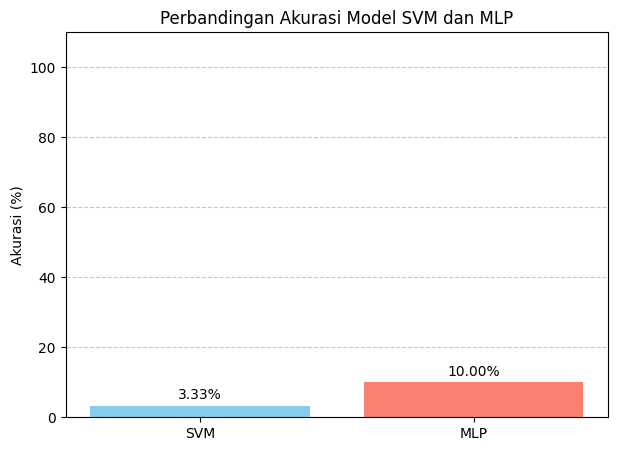

In [19]:
import matplotlib.pyplot as plt

# Data akurasi
models = ['SVM', 'MLP']
accuracies = [svm_accuracy * 100, mlp_accuracy * 100]

# Buat grafik batang
plt.figure(figsize=(7, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])

# Tambahkan nilai di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Label dan judul
plt.title('Perbandingan Akurasi Model SVM dan MLP')
plt.ylabel('Akurasi (%)')
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()
